In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
_,x_data, y_data, y_err = np.loadtxt('variable_star.csv', delimiter = ',', unpack=True, skiprows=1)


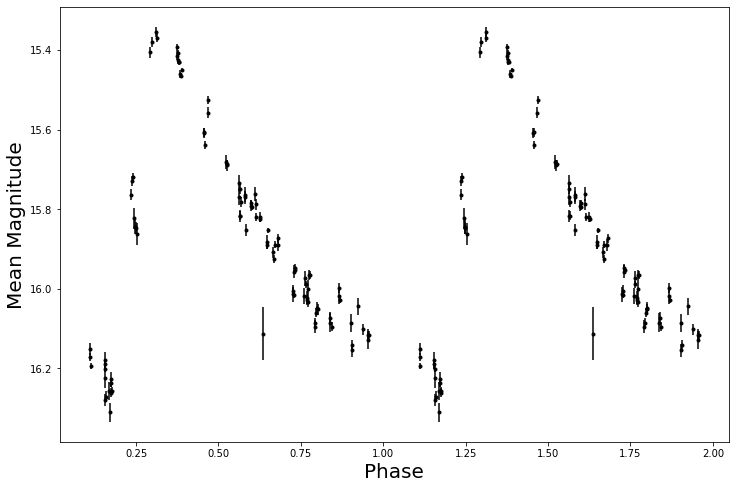

In [3]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.invert_yaxis()
ax.errorbar(x_data, y_data, y_err, c='k', fmt='o',ms=3)
ax.set_ylabel('Mean Magnitude', fontsize=20)
ax.set_xlabel('Phase', fontsize=20)
plt.show()

a= 0.081+/-0.029
b=-0.036+/-0.026
c=15.808+/-0.019


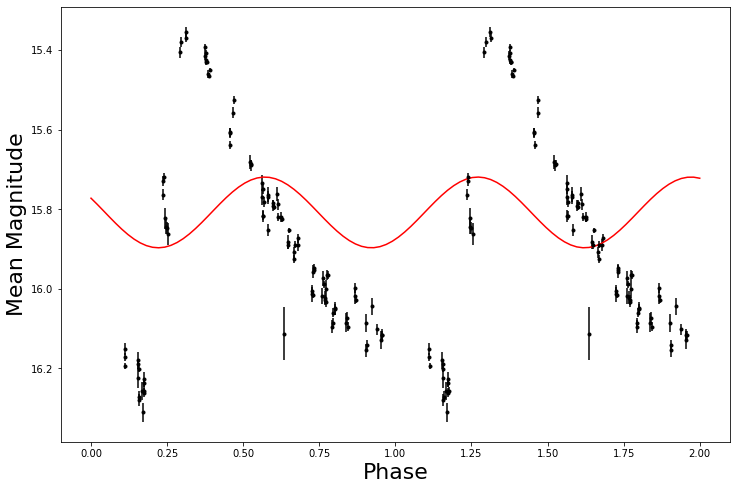

In [4]:
#we have to define our model with our needed parameters
def f(x,a,b,c):
    return a*np.sin(2*np.pi*x/.7) + b*np.cos(2*np.pi*x/.7) + c


par0    = np.array([1,2, 16]) # initial guess for parameters
par, cov = curve_fit(f, x_data, y_data, par0, sigma=y_err) #fitter.curve_fit takes in the model, x,y data, guess, and sigma

# par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
a = par[0]
ea = np.sqrt(cov[0,0])
print('a={0:6.3f}+/-{1:5.3f}'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('b={0:6.3f}+/-{1:5.3f}'.format(b,eb))
c = par[2]
ec = np.sqrt(cov[2,2])
print('c={0:6.3f}+/-{1:5.3f}'.format(c,ec))


#plot everything now
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.invert_yaxis()
ax.errorbar(x_data, y_data, y_err, c='k', fmt='o',ms=3)
ax.set_ylabel('Mean Magnitude', fontsize=22)
ax.set_xlabel('Phase', fontsize=22)
xfit = np.linspace(0,2,100)
plt.plot(xfit,f(xfit,par[0],par[1],par[2]),'r-')
plt.show()

## As we add more sines and cosines to our curve fitting, we eventually get something that looks like this!

<img src="lightcurve.png">

# ROOT FINDING


<img src="lagrange points.jpg">






You may derive in 5A (or look up in a textbook) that assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, that the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r
$$
where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's
gravitational constant, and $\omega$ is the angular velocity of both the
Moon and the satellite.

The equation above is a fifth-order polynomial equation in $r$ (also called a quintic equation). Such equations cannot be solved exactly in closed form, but it's straightforward to solve them numerically.  Write a program to solve for the distance $r$ from the Earth to the $L_1$ point.  Compute a solution accurate to at least four significant figures.

In [5]:
from scipy.optimize import bisect

def L1(r):
    G = 6.674e-11 # m^3 kg^-1 s^-2
    M = 5.974e24 # kg
    m = 7.348e22 # kg
    R = 3.844e8 # m     average distance between moon and earth
    w = 2.662e-6 #s^-1
    return (G*M)/r**2 - (G*m)/(R - r)**2 - w**2 * r

R = 3.844e8 # m
x_err = 10

# search for solutions between 1 and R - 1 because the LHS is very large and positive at r = 1
# and very large and negative at r = R - 1
x = bisect(L1, 1, R-1, xtol=x_err)  

print('The distance from the center of the earth to L1 is ({:.0f} +/- {:0.3f}) km'.format(x/1000, x_err/1000))

The distance from the center of the earth to L1 is (326045 +/- 0.010) km
